# Overview
In this notebook we explore the concept of joint probability and will learn about the connections between joint probabilities, joint distributions, joint moments, and much more.

# Prerequisites
- [Linearity and Linear Combinations](../Linearity/Linearity.ipynb)

# 1. Joint Events

A joint event is some where multiple random variables realize specific values. In other words its an event where multiple things happen at the same time. In set theory these events are represented as intersections. For example the event that it rains and you forgot an umbrella is a very unfortunate joint event.

# 2. Joint Random Variables
A joint variable is a variable that expresses the realization of a joint event. In other words, it considers or is dependent on realizations of other other variables for its value. For example, the probability of a tornado occuring depends on a number of factors; the temperature, the moisture in the air, the terrain, the temperature, etc. For the tornado to occur, all of these discrete components must realize values within a particular segment of their domain.

In the simplest case (the unideimensional and univariate case) a uni-dimensional variable $y$ is dependent on one other variable $x$. We can mathematically describe the relationships as a transformation such as $y=mx$ or equivalently as a function which applies a transformation $y=m(x)$.

When the uni-dimensional variable $y$ is dependent on multiple variables $x_i \in X$ we can describe $y$ as the linear combination (or sum) of a set of transformations applied to a set of variables. Mathematically we can again describe the relationships as a transformation such as $y=mX$ or equivalently as a function which applies a transformation $y=m(X)$. Note that if we expand the matrix notation to non-matrix notation we would have $y = m_1X_1 + m_2X_2 + \cdots m_nX_n$ or $y = m_1(X_1) + m_2(X_2) + \cdots m_n(X_n)$.
We express joint variables as a [linear combination](../Linearity/Linearity.ipynb).

In short, the join random relationship or the joint random variable can be represented using a transformation applied to a linear combination of stochastic variables.

# 3. Joint Probability

A joint probability is a probability that describes the behavior of a joint random variable realizing a joint event.

We might ask for the probability that $X_1$ and $X_2$ take on specific values:

$$ \mathbb{P}(X_1=x_1 \cap X_2=x_2) $$

If we modify the notation we can ask for the probability of the joint random variable:

$$ Y = f(X_1, X_2) = a_1X_1 + a_2X_2 $$

$$ \rightarrow y_n = f(x_{1_n}, x_{2_n})$$

$$ \mathbb{P}(Y = y_1) = \mathbb{P}(X_1=x_1 \cap X_2=x_2) $$


# 4. Joint Distributions
As any distribution, a joint distribution expresses the probability of an event. In this case the event is a joint event and exists in space related to a joint probability. As discussed previously, a joint probability expresses the probability that two events occur at the same time:

$$ P(A \cap B) := P(A=a \cap B = b), \ \  \forall a \in A, \forall b \in B$$

Joint distributions are also commonly referred to as multivariate distributions. Meaning that they yield the probability that $n$ variables yield a given $n$ value within an $n$-dimensional space.

## 4.1. Defintion

A multivariate function is a joint probability distribution if it satisfies the following requirements:

1. All events in X are probable
$$f(X) \ge 0 \ \ \forall \ \  X_i \in X$$
2. The total probability of the space is 1
$$ \int \cdots \int f(X) \ d_{X_1} \cdots d_{X_n} = 1$$
3. The probability of an event is given my the multiple integral of the pdf 
$$\mathbb{P}(X \in A) = \underset{A}{\int \cdots \int}f(X) \ \ dA $$

## 4.2 Visual Example

Representing the multivariate distribution visually is a bit tricky for a few reasons. First, the tools just arnt there (we will see an example in a minute). Second, once you get above two dimensions it becomes difficult to represent the shape (how to you represent a 5 dimensional surface on a 2D piece of paper?).

Below we see an attempt at a 3D rendering for a bivariate distribution but this is not the cleanest or most intuitive representation.

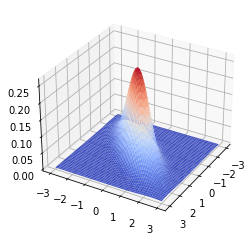

In [1]:
import numpy
import pandas
from matplotlib import pyplot, cm
import scipy

from scipy.stats import multivariate_normal

mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8, 1]])

x = numpy.linspace(-3, 3, 200)
y = numpy.linspace(-3, 3, 200)
x, y = numpy.meshgrid(x, y)
grid_coord = numpy.dstack((x,y))

rv = multivariate_normal(mu, sigma)
z = rv.pdf(grid_coord)

fig = pyplot.figure()
ax = fig.gca(projection='3d')
#ax.plot_wireframe(x,y,z, cmap=cm.coolwarm)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.view_init(30, 30)

pyplot.show()

More on this type of plot can be found [here](https://www.ritchievink.com/blog/2019/02/01/an-intuitive-introduction-to-gaussian-processes/).

Instead I find the following diagram more useful

<center><img src='images/multivariate_distribution.jpg' height='400px' width='400px' ></center>

We see that the distribution is expressed in three dimensional space with the various components being labeled. This type of diagram however is difficult to produce using python.

Visually, the distribution is centered around the mean and the covariance matrix defines its shape around the mean. 

Let's examine the two dimensional case. 

If the underlying distributions independant ($X_1 \perp  X_2$ we will have a covariance matrix such that $\Sigma = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$ and we will see that the two dimensional space is a circle:

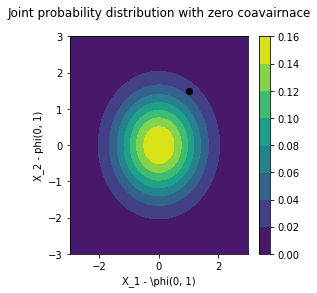

In [183]:
import numpy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0],[0,1]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
ax.set_title('Joint probability distribution with zero coavairnace', pad=20)
ax.set_xlabel('X_1 - \phi(0, 1)')
ax.set_ylabel('X_2 - phi(0, 1)')
pyplot.xlim([-3, 3])
pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour)
ax.scatter(1,1.5,c='black');

If we look at an arbitrary point where $X_1 = 1$ and $X_2 = 1.5$ we see this point falls towards the top right of the space and would have a lower probability than that of the center.

If there is an asymmetry and one distribution has a larger standard deviation than the other we will see the space stretches in that dimension. In our case the $X_2$ is such that $\sigma_2=5$. We see the probability of our point has increased.

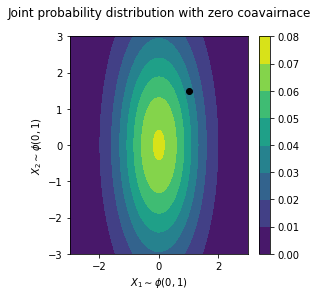

In [1]:
import numpy
import scipy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0],[0,5]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
ax.set_title('Joint probability distribution with zero coavairnace', pad=20)
ax.set_xlabel('$X_1 \sim \phi(0, 1)$')
ax.set_ylabel('$X_2 \sim \phi(0, 1)$')
pyplot.xlim([-3, 3])
pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour)
ax.scatter(1,1.5,c='black');

If the two distrinutions co-vary meaning that the $X_1$ and $X_2$ are not strictly independent, we see that the space again stetches, but not along either dimension. It becomes skewed to the right indicating that similar values between $X_1$ and $X_2$ are expected to occur more frequently. As the covariance increases, the "width" of the space will continue to shrink while the length continues to increase.

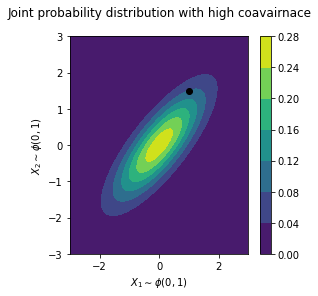

In [2]:
import numpy
import scipy
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Generate a random normal variable which we will use to calculate probabilities
mu = [0, 0]
sigma = numpy.array([[1, 0.8],[0.8,1]])
rv = multivariate_normal(mu, sigma)

# Generate a 2D meshgrid
#    https://www.geeksforgeeks.org/numpy-meshgrid-function/
xv, yv = numpy.meshgrid(numpy.linspace(-3, 3, 200), numpy.linspace(-3, 3, 200))

# Transform into a list of coordinates
grid_coord = numpy.dstack((xv, yv))

# Calculate probabilities for each coordinate pair
prob_coord = rv.pdf(grid_coord)

# Create an object to hold our visuals and set the dimensions and labels
fig, ax = pyplot.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
ax.set_title('Joint probability distribution with high coavairnace', pad=20)
ax.set_xlabel('$X_1 \sim \phi(0, 1)$')
ax.set_ylabel('$X_2 \sim \phi(0, 1)$')
pyplot.xlim([-3, 3])
pyplot.ylim([-3, 3])

# Plot the countour map, color bar, and point
contour = ax.contourf(xv, yv, prob_coord, cmap=pyplot.rcParams['image.cmap'])
color_bar = pyplot.colorbar(contour)
ax.scatter(1,1.5,c='black');

Conversely a negative covariance would skew towards the left.

# 5. Joint MGFs and Joint Expectation

The moment generating function and thus expectations can be generalized to accomodate joint random variables.

$$ M_Y(C) = \mathbb{E}\left[ e^{CIY} \right] $$

$$ = \mathbb{E}\left[ e^{CI(a_1X_1 + \cdots + a_nX_n)} \right]
$$

$$ = \mathbb{E}\left[ e^{c_1a_1X_1 + \cdots + c_na_nX_n} \right]
$$

$$ = \mathbb{E}\left[ e^{\sum c_ia_iX_i} \right]$$

$$ = e^{\sum c_ia_i\mathbb{E}[X_i]}$$


More on this topic can be found [here](https://analystprep.com/study-notes/actuarial-exams/soa/p-probability/multivariate-random-variables/explain-and-apply-joint-moment-generating-functions/)